# 1. Simulation of Markov Process.

## a.

The transition matrix, $P$, is given by 

\begin{align*}
P = 
\begin{pmatrix}
0.2 & 0.7 & 0.1 \\
0.2 & 0.5 & 0.3 \\
0.2 & 0.4 & 0.4
\end{pmatrix}
\end{align*}

## b.

In [1]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

In [2]:
P = np.array([[0.2, 0.7, 0.1], [0.2, 0.5, 0.3], [0.2, 0.4, 0.4]])

np.random.seed(112523)
states = np.arange(1, len(P) + 1)

def markov_process(P, nrun, x0):
    xt = []
    current_state = x0
    
    for _ in range(nrun):
        current_state = np.random.choice(
            states,
            p = [P[current_state - 1, next_state - 1] for next_state in states]
        )
        xt.append(current_state)
    
    return x0, xt

out = markov_process(P, 10, 1)
print("Initial state:", out[0], "\nSimulated chain:", out[1])

Initial state: 1 
Simulated chain: [2, 1, 3, 1, 2, 2, 2, 3, 3, 3]


# 2. Stationary Distribution.

## a.

First, 

\begin{align*}
P^T = 
\begin{pmatrix}
0.2 & 0.2 & 0.2 \\
0.7 & 0.5 & 0.4 \\
0.1 & 0.3 & 0.4
\end{pmatrix}
\end{align*}

Then 

\begin{align*}
P^T \cdot \pi & = \pi \\
(P^T - I) \pi & = 0 \\
\left[\begin{pmatrix}
0.2 & 0.2 & 0.2 \\
0.7 & 0.5 & 0.4 \\
0.1 & 0.3 & 0.4
\end{pmatrix} - 
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 
\end{pmatrix}\right]
\begin{pmatrix}
\pi_1 \\ \pi_2 \\ \pi_3
\end{pmatrix} & = 
\begin{pmatrix}
0 \\ 0 \\ 0
\end{pmatrix} \\
\begin{pmatrix}
-0.8 & 0.2 & 0.2 \\
0.7 & -0.5 & 0.4 \\
0.1 & 0.3 & -0.6
\end{pmatrix}
\begin{pmatrix}
\pi_1 \\ \pi_2 \\ \pi_3
\end{pmatrix} & = 
\begin{pmatrix}
0 \\ 0 \\ 0
\end{pmatrix} \\
\begin{pmatrix}
1 & 0 & -\frac{9}{13} \\
0 & 1 & -\frac{23}{13} \\
0 & 0 & 0 
\end{pmatrix}
\begin{pmatrix}
\pi_1 \\ \pi_2 \\ \pi_3
\end{pmatrix} & = 
\begin{pmatrix}
0 \\ 0 \\ 0
\end{pmatrix}
\end{align*}
On the other hand, we have, $\pi_1 + \pi_2 + \pi_3 = 1$. 
Hence $$\pi^T = \left(\frac{1}{5}, \frac{23}{45}, \frac{13}{45} \right)$$

Check: $$\pi^T \cdot P = \pi^T$$

In [3]:
pi_ = np.array([1/5, 23/45, 13/45])
np.dot(pi_.T, P)

array([0.2       , 0.51111111, 0.28888889])

Since the stationary distribution is the (appropriately normalized) left eigenvector of $P$ corresponding to an eigenvalues of $1$, we can calculate it in python with the following:

In [4]:
evals, evecs = np.linalg.eig(P.T)
evec1 = evecs[:,np.isclose(evals, 1)] # np.isclose returns an array
evec1 = evec1[:,0]
# normalize the eigenvector to sum to 1
stationary = evec1 / evec1.sum()
stationary = stationary.real
stationary

array([0.2       , 0.51111111, 0.28888889])

## b.

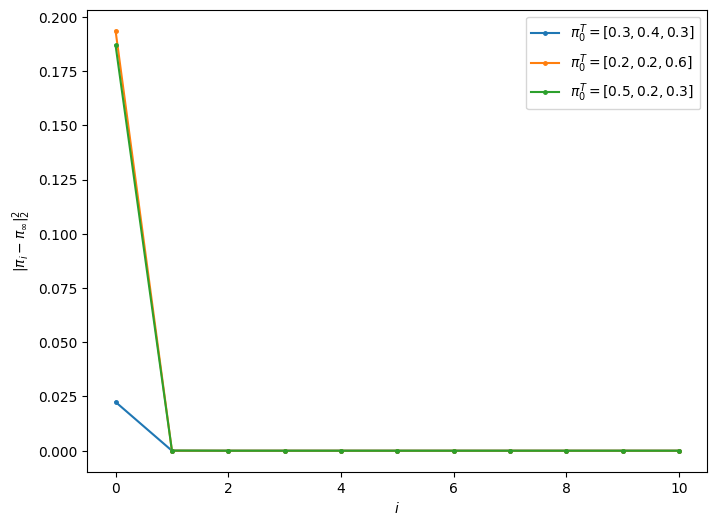

In [5]:
def pi_norm(pi_0, n):
    norm = [np.linalg.norm(pi_0 - stationary)**2]
    P_mul = P.copy()
    
    for i in range(n):
        P_mul = np.matmul(P_mul, P)
        pi_t = np.matmul(pi_0, P_mul)
        norm.append(np.linalg.norm(pi_t - stationary)**2)
        
    return norm

initial = [np.array([0.3, 0.4, 0.3]),
           np.array([0.2, 0.2, 0.6]),
           np.array([0.5, 0.2, 0.3])]

n = 10
plt.figure(figsize = (8,6))

for pi_0 in initial:
    norm = pi_norm(pi_0, n)
    plt.plot(np.arange(0, n+1), norm, marker = ".", markersize = 5, 
             label = r"$\pi_0^T = [{}]$".format(', '.join(map(str, pi_0))))
plt.xlabel(r"$i$")
plt.ylabel(r"$\|\pi_i - \pi_\infty\|^2_2$")
plt.legend()
plt.show()

# 3. Absorbing State.

## a.

In [6]:
np.random.seed(112523)

def markov_process2(P, x0):
    current_state = x0
    arrival_time = 0
    
    while current_state != 3:
        current_state = np.random.choice(
            states, p = [P[current_state - 1, next_state - 1] for next_state in states]
        )
        arrival_time += 1
    return arrival_time

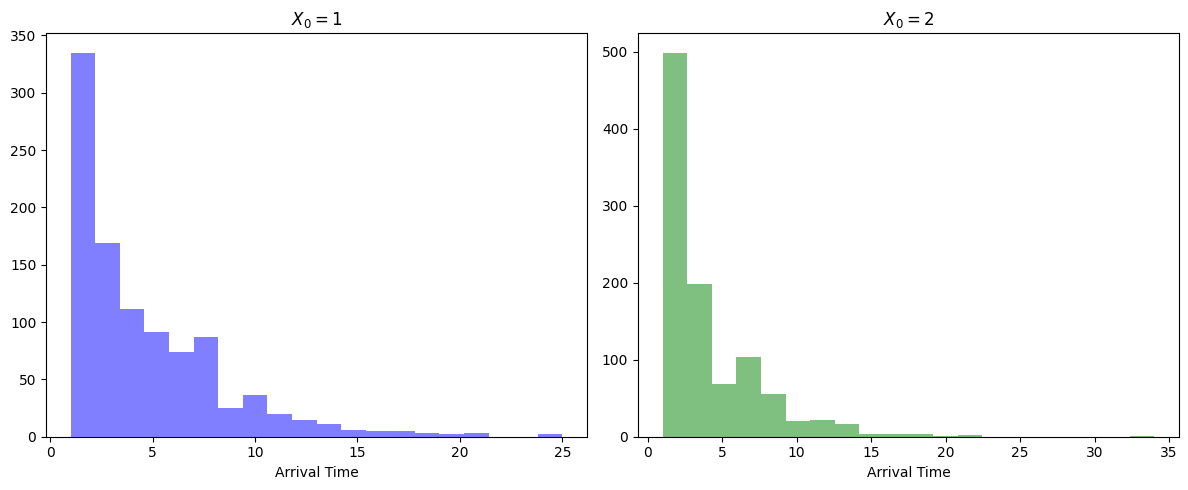

In [7]:
nsim = 1000
x0_1 = [markov_process2(P, x0 = 1) for _ in range(nsim)]
x0_2 = [markov_process2(P, x0 = 2) for _ in range(nsim)]

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.hist(x0_1, bins = 20, color = "blue", alpha = 0.5)
plt.title(r"$X_0 = 1$")
plt.xlabel("Arrival Time")

plt.subplot(1,2,2)
plt.hist(x0_2, bins=20, color = "green", alpha = 0.5)
plt.title(r"$X_0 = 2$")
plt.xlabel("Arrival Time")

plt.tight_layout()
plt.show()

## b.

Given $$\mu_i = 1 + \sum_{j = 1}^{3} p_{ij} \mu_j$$ with $\mu_i = \mathbb{E}[T_i]$.

For an absorbing state $3$ ($\mu_3 = 0$), then we have 

\begin{align*}
\mu_1 & = 1 + 0.2 \mu_1 + 0.7 \mu_2 + 0.1 \mu_3 \\
\mu_2 & = 1 + 0.2 \mu_1 + 0.5 \mu_2 + 0.3 \mu_3 \\
\mu_3 & = 0
\end{align*}

This implies 

\begin{align*}
\mu_1 & = \frac{60}{13} \\
\mu_2 & = \frac{50}{13} \\
\mu_3 & = 0
\end{align*}

In [8]:
A = np.array([[0.8, -0.7, -0.1], [-0.2, 0.5, -0.3], [0, 0, 1]])
b = np.array([1, 1, 0])

mu = np.linalg.solve(A, b)
mu

array([4.61538462, 3.84615385, 0.        ])

In [9]:
[np.mean(x0_1), np.mean(x0_2)]

[4.648, 3.811]

The results we found in part (a) is close to the theoritical mean arrival time to the absorbing state.